In [49]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns




In [50]:
out_files = glob.glob('output/*.out')
elapsed_time = [] # seconds
file = []
task_time = [] # mu s
for out_file in out_files:
    # Read the file line by line
    try:
        file.append(int(out_file.split('/')[-1].split('_')[1].split('.')[0])-1)
    except:
        continue
    with open(out_file, 'r') as f:
        lines = f.readlines()
    # Extract the time and the energy from the file
    task_time.append(float(lines[-1].split()[-1]))
    elapsed_time.append(float(lines[-2].split()[-1]))
print(task_time)
print(file)

file = np.array(file)
task_time = np.array(task_time)
elapsed_time = np.array(elapsed_time)
print(elapsed_time)
    

[59.68, 480.6, 76.95, 233.0, 29.93, 116.6, 33.91, 1041.0, 46.87, 2647.0, 39.17]
[63, 7, 47, 15, 127, 31, 111, 3, 79, 1, 95]
[  3.911  31.5     5.043  15.27    1.961   7.641   2.222  68.22    3.072
 173.5     2.567]


In [51]:
seq_task_time = (2640/(4**8)) * 1e6
seq_elapsed_time = 173


In [52]:
tot_task_time = file*task_time
print(tot_task_time)

[3759.84 3364.2  3616.65 3495.   3801.11 3614.6  3764.01 3123.   3702.73
 2647.   3721.15]


In [88]:

tmp_task_time = task_time[np.argsort(file)]
tmp_tot_task_time = tot_task_time[np.argsort(file)]
tmp_elapsed_time = elapsed_time[np.argsort(file)]
tmp_file = file[np.argsort(file)]


tmp_abs_time = tmp_elapsed_time
tmp_rel_time = seq_elapsed_time/tmp_elapsed_time


print(tmp_tot_task_time)


[2647.   3123.   3364.2  3495.   3614.6  3616.65 3759.84 3702.73 3721.15
 3764.01 3801.11]


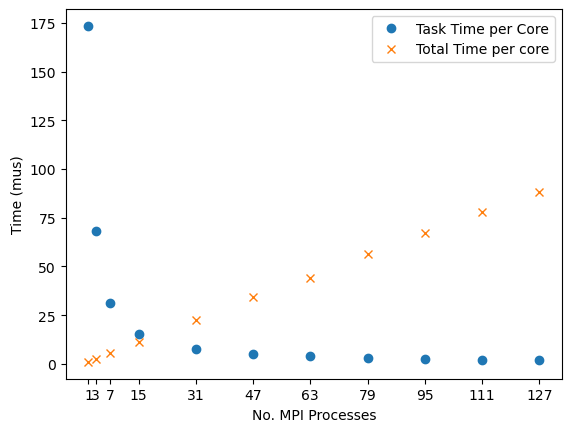

In [54]:
# plot
plt.plot(tmp_file, tmp_abs_time, 'o', label='Absolute Speedup')
plt.plot(tmp_file, tmp_rel_time, 'x', label='Relative Speedup')
plt.xlabel('No. MPI Processes')
plt.ylabel('Time (mus)')
plt.xticks(tmp_file)
plt.legend()
#plt.yscale('log')   

/Users/oscarobel/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/oscarobel/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/oscarobel/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/oscarobel/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

<function matplotlib.pyplot.clf() -> 'None'>

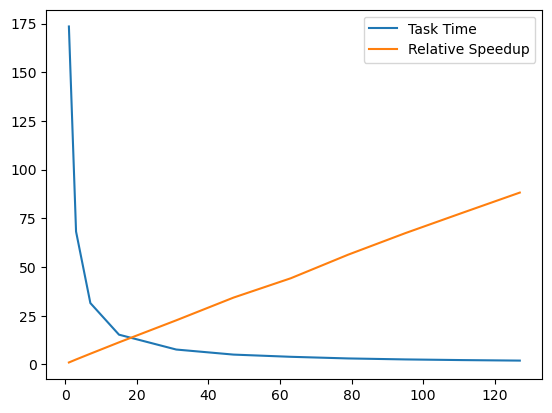

In [79]:

sns.lineplot(x=tmp_file, y=tmp_abs_time, label='Task Time')
sns.lineplot(x=tmp_file, y=tmp_rel_time, label='Relative Speedup')
# sns.lineplot(x=tmp_file, y=tmp_tot_task_time, label='CPU time spend per task')
plt.clf


/Users/oscarobel/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/oscarobel/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/oscarobel/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/oscarobel/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

/Users/oscarobel/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/oscarobel/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


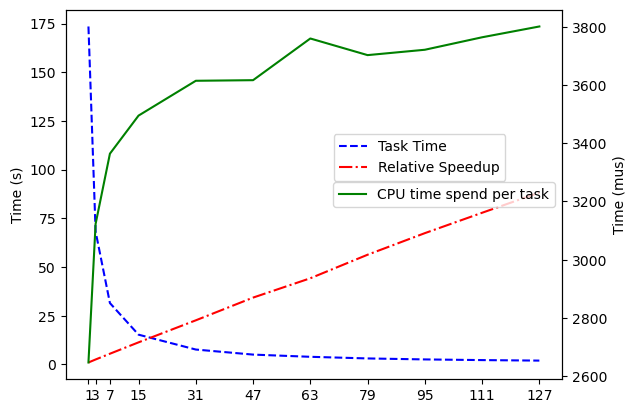

In [89]:
# plot on the same graph with different y axis different colors
sns.lineplot(x=tmp_file, y=tmp_abs_time,color='b',linestyle='--',label='Task Time')
# sns.lineplot(x=tmp_file, y=tmp_abs_time,label='Task Time')
sns.lineplot(x=tmp_file, y=tmp_rel_time,color='r',linestyle='-.',label='Relative Speedup')
# sns.lineplot(x=tmp_file, y=tmp_rel_time, label='Relative Speedup')
plt.legend(loc='center right',bbox_to_anchor=(0.9, 0.6))
plt.ylabel('Time (s)')
plt.twinx()
sns.lineplot(x=tmp_file, y=tmp_tot_task_time, color='g',label='CPU time spend per task')
# sns.lineplot(x=tmp_file, y=tmp_tot_task_time, label='CPU time spend per task')
plt.ylabel('Total CPU Time (mus)')
plt.xlabel('No. MPI Processes')
plt.xticks(tmp_file)
# move the legend to one box to the right of the plot and not overlapping
plt.legend(loc='center right')
# plt.legend(['Task Time', 'Relative Speedup', 'CPU time spend per task'])
plt.show()

/Users/oscarobel/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/oscarobel/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/oscarobel/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/oscarobel/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

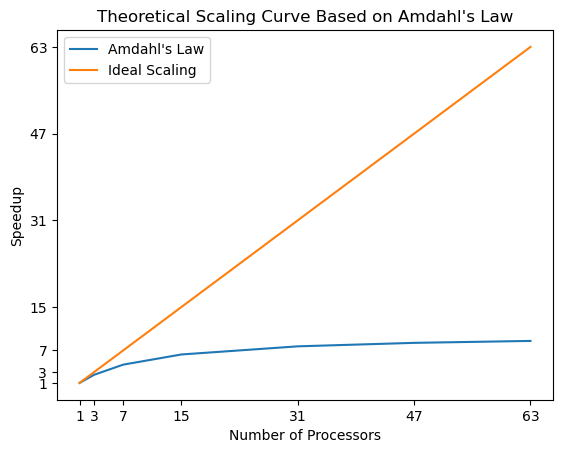

In [56]:
def amdahls_law(p, s):
    return 1 / (s + ((1 - s) / p))

# Number of processors
processors = np.array([2,4,8,16,32,48,64])-1 

# Assuming 10% serial fraction
serial_fraction = 0.10

# Calculate speedups
speedups = [amdahls_law(p, serial_fraction) for p in processors]


sns.lineplot(x=processors, y=speedups, label='Amdahl\'s Law')
sns.lineplot(x=processors, y=processors, label='Ideal Scaling')
plt.title("Theoretical Scaling Curve Based on Amdahl's Law")
plt.xlabel("Number of Processors")
plt.ylabel("Speedup")
plt.xticks(processors)
plt.yticks(processors)
plt.legend()
plt.show()